<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import pandas as pd 
import scipy.stats as stats
import seaborn as sns
from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'scipy'

In [3]:
df = pd.read_excel('Full_result(V2).xlsx')
df.shape

(125, 44)

In [4]:
# show columns
df.columns

Index(['Unnamed: 0', 'participant', 'id', 'age', 'gender',
       'before_First-Person Shooter/Third-Person Shooter',
       'before_Action-Role-Playing/Adventure',
       'before_Real-Time Strategy/MOBA',
       'before_MMORPG/Turn-Based Strategy/Turn-Based Action Role-Playing',
       'before_2D Turn-Based Strategy/Card Game', 'before_3D Puzzle Game',
       'before_Sports/Driving', 'before_Music Game', 'before_Others',
       'during_First-Person Shooter/Third-Person Shooter',
       'during_Action-Role-Playing/Adventure',
       'during_Real-Time Strategy/MOBA',
       'during_MMORPG/Turn-Based Strategy/Turn-Based Action Role-Playing',
       'during_2D Turn-Based Strategy/Card Game', 'during_3D Puzzle Game',
       'during_Sports/Driving', 'during_Music Game', 'during_Others',
       'subject_id', 'cspan', 'c_rt_avg', 'str_c_rt_avg_control',
       'str_c_rt_avg_congruent', 'str_c_rt_avg_incongruent',
       'correct_rate_control', 'correct_rate_congruent',
       'correct_rate_in

In [5]:
del df['c_rt_avg']

In [6]:
# Delete subject ids
removelist = ['participant', 'id', 'subject_id', 'Unnamed: 0']
for i in removelist:
    del df[i]
df

,age,gender,before_First-Person Shooter/Third-Person Shooter,before_Action-Role-Playing/Adventure,before_Real-Time Strategy/MOBA,before_MMORPG/Turn-Based Strategy/Turn-Based Action Role-Playing,before_2D Turn-Based Strategy/Card Game,before_3D Puzzle Game,before_Sports/Driving,before_Music Game,...,final_amount,loss_total,win_total,b1_score,b2_score,b3_score,b4_score,b5_score,dm_under_limited,dm_under_risk
0,18,female,1,1,1,1,1,1,1,1,...,1150,8250,7400,-8,4,-6,6,8,-4,8
1,21,female,1,3,1,1,1,4,1,3,...,0,11550,9550,-8,-16,-20,-18,-20,-24,-58
2,18,female,1,2,1,1,2,1,2,1,...,-900,11400,8500,-2,2,-16,-8,-16,0,-40
3,18,male,6,5,3,2,1,3,3,2,...,-50,9450,7400,2,-2,4,-4,4,0,4
4,20,male,4,2,2,1,3,2,2,1,...,1100,9500,8600,-16,-12,-12,6,-10,-28,-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,19,female,2,5,1,2,4,6,5,2,...,1850,7950,7800,-6,-4,-18,0,16,-10,-2
121,23,female,2,2,2,1,3,2,2,2,...,1200,6950,6150,10,-4,8,20,20,6,48
122,21,male,2,1,3,3,4,1,2,1,...,1750,8650,8400,-6,-18,-6,-8,2,-24,-12
123,18,female,1,1,1,1,1,1,2,2,...,650,9200,7850,-6,-2,-2,-4,0,-8,-6


In [7]:
# dummy label gender
df['gender'] = df['gender'].astype('category')
df['gender'].dtype
df['gender_coded'] = df['gender'].cat.codes

In [8]:
df['gender_coded'] = df['gender_coded'].astype('int')

In [10]:
# delete gender column
del df['gender']

In [11]:
# use shapiro test to test normality of the data 
columns = list(df.columns)
for i in columns:
    print(f'{i}\n {stats.shapiro(df[i])}')

age
 ShapiroResult(statistic=0.8706799745559692, pvalue=4.774348472125212e-09)
before_First-Person Shooter/Third-Person Shooter
 ShapiroResult(statistic=0.7782942652702332, pvalue=1.840524911297936e-12)
before_Action-Role-Playing/Adventure
 ShapiroResult(statistic=0.7980493903160095, pvalue=7.953984693109817e-12)
before_Real-Time Strategy/MOBA
 ShapiroResult(statistic=0.6416687965393066, pvalue=4.998157721477191e-16)
before_MMORPG/Turn-Based Strategy/Turn-Based Action Role-Playing
 ShapiroResult(statistic=0.616792619228363, pvalue=1.4476865094649862e-16)
before_2D Turn-Based Strategy/Card Game
 ShapiroResult(statistic=0.7509933114051819, pvalue=2.804567016991e-13)
before_3D Puzzle Game
 ShapiroResult(statistic=0.5964911580085754, pvalue=5.497581979114821e-17)
before_Sports/Driving
 ShapiroResult(statistic=0.8110321760177612, pvalue=2.1965682744928827e-11)
before_Music Game
 ShapiroResult(statistic=0.63178551197052, pvalue=3.0327554102275154e-16)
before_Others
 ShapiroResult(statistic=0

In [12]:
columns = ['str_c_rt_avg_control', 'str_c_rt_avg_congruent', 'str_c_rt_avg_incongruent', 'stroop_effect', 'igt_rt_avg']
#find Q1, Q3, and interquartile range for each column
Q1 = df[columns].quantile(q=.25)
Q3 = df[columns].quantile(q=.75)
iqr = df[columns].apply(stats.iqr)
print(iqr)
#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = df[~((df[columns] < ( )) | (df[columns] > (Q3+1.5*iqr))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape

str_c_rt_avg_control        216.53
str_c_rt_avg_congruent      194.35
str_c_rt_avg_incongruent    199.50
stroop_effect                89.66
igt_rt_avg                  293.05
dtype: float64


(116, 39)

In [22]:

data_clean.describe()

,age,before_First-Person Shooter/Third-Person Shooter,before_Action-Role-Playing/Adventure,before_Real-Time Strategy/MOBA,before_MMORPG/Turn-Based Strategy/Turn-Based Action Role-Playing,before_2D Turn-Based Strategy/Card Game,before_3D Puzzle Game,before_Sports/Driving,before_Music Game,before_Others,...,final_amount,loss_total,win_total,b1_score,b2_score,b3_score,b4_score,b5_score,dm_under_limited,dm_under_risk
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,...,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,19.991379,2.500000,2.551724,2.043103,1.896552,2.060345,1.646552,2.250000,1.637931,1.793103,...,700.431034,9003.017241,7703.448276,-4.172414,-3.396552,-0.931034,-0.672414,0.775862,-7.568966,-0.827586
std,1.660255,1.810597,1.795380,1.741525,1.573583,1.487857,1.217655,1.407279,1.090644,1.308947,...,1976.574724,2339.103217,915.060562,7.532279,9.179258,10.659737,11.783390,12.071588,12.993125,28.774468
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-6000.000000,3350.000000,5350.000000,-20.000000,-20.000000,-20.000000,-20.000000,-20.000000,-36.000000,-60.000000
25%,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-812.500000,7450.000000,7187.500000,-10.000000,-10.000000,-8.000000,-8.000000,-8.000000,-16.000000,-20.000000
50%,20.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,825.000000,9125.000000,7800.000000,-4.000000,-2.000000,0.000000,-2.000000,0.000000,-7.000000,-4.000000
75%,21.000000,4.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,...,2062.500000,10712.500000,8312.500000,0.000000,2.000000,4.000000,6.000000,12.000000,2.000000,10.500000
max,25.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,4500.000000,16000.000000,9700.000000,20.000000,20.000000,20.000000,20.000000,20.000000,30.000000,60.000000


In [21]:
df_test = pd.read_excel('Full_result(V2).xlsx')
df_test['gender'].value_counts()

female        87
male          37
non-binary     1
Name: gender, dtype: int64

array([[<AxesSubplot:title={'center':'str_c_rt_avg_control'}>,
        <AxesSubplot:title={'center':'str_c_rt_avg_congruent'}>],
       [<AxesSubplot:title={'center':'str_c_rt_avg_incongruent'}>,
        <AxesSubplot:title={'center':'stroop_effect'}>],
       [<AxesSubplot:title={'center':'igt_rt_avg'}>, <AxesSubplot:>]],
      dtype=object)

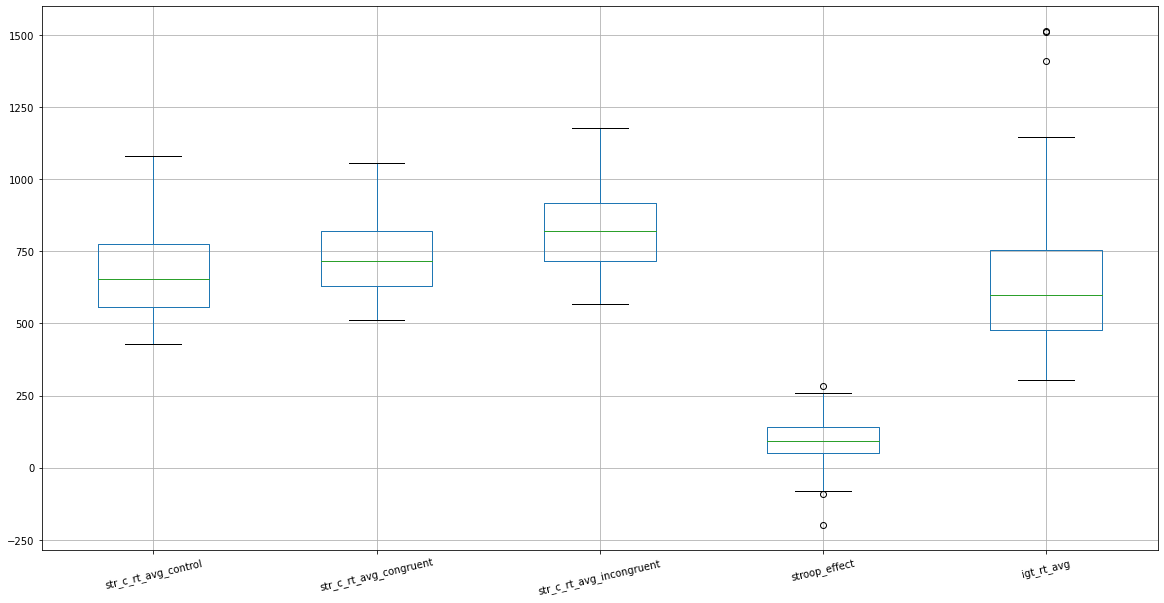

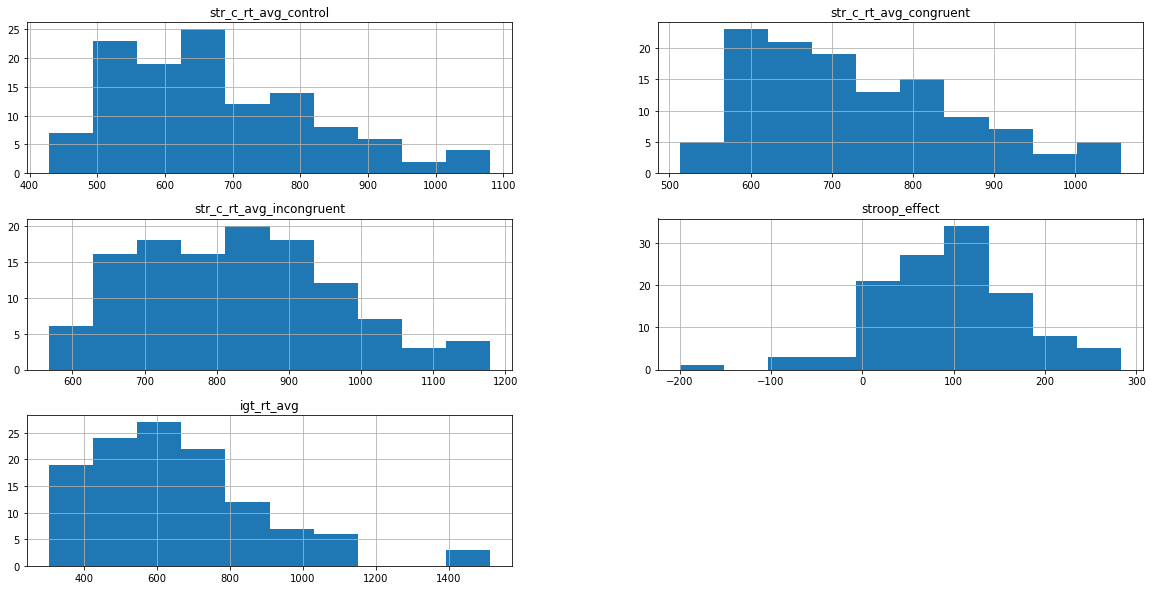

In [87]:
columns = ['str_c_rt_avg_control', 'str_c_rt_avg_congruent', 'str_c_rt_avg_incongruent','stroop_effect', 'igt_rt_avg']
df_clean.boxplot(column = columns, rot = 13, figsize=(20, 10))
df_clean.hist(column = columns, figsize=(20, 10))

In [90]:
# use shapiro test to test normality of the data 
columns = list(df_clean.columns)
for i in columns:
    print(f'{i}\n {stats.shapiro(df_clean[i])}')

age
 ShapiroResult(statistic=0.8684887290000916, pvalue=6.49206688407844e-09)
before_First-Person Shooter/Third-Person Shooter
 ShapiroResult(statistic=0.7747310996055603, pvalue=2.749373862256932e-12)
before_Action-Role-Playing/Adventure
 ShapiroResult(statistic=0.7870964407920837, pvalue=6.638670949771219e-12)
before_Real-Time Strategy/MOBA
 ShapiroResult(statistic=0.6381382942199707, pvalue=9.033101339072313e-16)
before_MMORPG/Turn-Based Strategy/Turn-Based Action Role-Playing
 ShapiroResult(statistic=0.6174852252006531, pvalue=3.283755359998402e-16)
before_2D Turn-Based Strategy/Card Game
 ShapiroResult(statistic=0.7466391324996948, pvalue=4.1727033070135255e-13)
before_3D Puzzle Game
 ShapiroResult(statistic=0.5970866680145264, pvalue=1.2560921566585957e-16)
before_Sports/Driving
 ShapiroResult(statistic=0.8123056292533875, pvalue=4.4887572825391686e-11)
before_Music Game
 ShapiroResult(statistic=0.6270267963409424, pvalue=5.214300412583991e-16)
before_Others
 ShapiroResult(statis

In [91]:
df_clean.to_excel('semi_clean_results(V1).xlsx')


In [111]:
ngamer_rule = ((df_clean['before_First-Person Shooter/Third-Person Shooter'] < 3) \
& (df_clean['before_Action-Role-Playing/Adventure'] < 3) \
& (df_clean['before_Real-Time Strategy/MOBA'] < 3) \
& (df_clean['before_MMORPG/Turn-Based Strategy/Turn-Based Action Role-Playing'] < 3) \
& (df_clean['before_3D Puzzle Game'] < 3) \
& (df_clean['before_2D Turn-Based Strategy/Card Game'] < 3) \
& (df_clean['before_Sports/Driving'] < 3)\
& (df_clean['before_Music Game'] < 5) \
& (df_clean['before_Others'] < 5) \
& (df_clean['during_First-Person Shooter/Third-Person Shooter'] < 3) \
& (df_clean['during_Action-Role-Playing/Adventure'] < 3) \
& (df_clean['during_Real-Time Strategy/MOBA'] < 3) \
& (df_clean['during_MMORPG/Turn-Based Strategy/Turn-Based Action Role-Playing'] < 3)\
& (df_clean['during_3D Puzzle Game'] < 3) \
& (df_clean['during_2D Turn-Based Strategy/Card Game'] < 3) \
& (df_clean['during_Sports/Driving'] < 3) \
& (df_clean['during_Music Game'] < 5) \
& (df_clean['during_Others'] < 5))

df_clean['gamer_status'] = np.where(ngamer_rule, 1, 0)
df_clean

,age,before_First-Person Shooter/Third-Person Shooter,before_Action-Role-Playing/Adventure,before_Real-Time Strategy/MOBA,before_MMORPG/Turn-Based Strategy/Turn-Based Action Role-Playing,before_2D Turn-Based Strategy/Card Game,before_3D Puzzle Game,before_Sports/Driving,before_Music Game,before_Others,...,correct_rate_control,correct_rate_congruent,correct_rate_incongruent,stroop_effect,igt_rt_avg,final_amount,loss_total,win_total,gender_coded,gamer_status
0,18,1,1,1,1,1,1,1,1,1,...,0.98,1.00,0.98,107.40,738.01,1150,8250,7400,0,1
1,21,1,3,1,1,1,4,1,3,1,...,0.98,1.00,0.83,213.39,516.73,0,11550,9550,0,0
2,18,1,2,1,1,2,1,2,1,2,...,0.92,0.95,0.95,129.82,907.36,-900,11400,8500,0,0
3,18,6,5,3,2,1,3,3,2,2,...,0.95,1.00,0.90,122.40,498.12,-50,9450,7400,1,0
4,20,4,2,2,1,3,2,2,1,1,...,0.95,0.90,0.93,119.40,719.04,1100,9500,8600,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,19,2,5,1,2,4,6,5,2,6,...,1.00,0.95,0.95,150.68,394.35,1850,7950,7800,0,0
119,23,2,2,2,1,3,2,2,2,2,...,0.98,0.85,0.97,58.00,591.06,1200,6950,6150,0,0
120,21,2,1,3,3,4,1,2,1,1,...,0.95,0.95,0.78,240.70,413.53,1750,8650,8400,1,0
121,18,1,1,1,1,1,1,2,2,1,...,1.00,1.00,0.97,27.16,752.85,650,9200,7850,0,1


In [112]:
df_clean.to_excel('semi_clean_results(V2).xlsx')

In [113]:
ngamer_rule = ((df['before_First-Person Shooter/Third-Person Shooter'] < 3) \
& (df['before_Action-Role-Playing/Adventure'] < 3) \
& (df['before_Real-Time Strategy/MOBA'] < 3) \
& (df['before_MMORPG/Turn-Based Strategy/Turn-Based Action Role-Playing'] < 3) \
& (df['before_3D Puzzle Game'] < 3) \
& (df['before_2D Turn-Based Strategy/Card Game'] < 3) \
& (df['before_Sports/Driving'] < 3)\
& (df['before_Music Game'] < 5) \
& (df['before_Others'] < 5) \
& (df['during_First-Person Shooter/Third-Person Shooter'] < 3) \
& (df['during_Action-Role-Playing/Adventure'] < 3) \
& (df['during_Real-Time Strategy/MOBA'] < 3) \
& (df['during_MMORPG/Turn-Based Strategy/Turn-Based Action Role-Playing'] < 3)\
& (df['during_3D Puzzle Game'] < 3) \
& (df['during_2D Turn-Based Strategy/Card Game'] < 3) \
& (df['during_Sports/Driving'] < 3) \
& (df['during_Music Game'] < 5) \
& (df['during_Others'] < 5))

df['gamer_status'] = np.where(ngamer_rule, 1, 0)
df.to_excel('initial_results(V3).xlsx')

In [130]:
avg_rule = ((df['before_First-Person Shooter/Third-Person Shooter'] >= 3) | (df['before_Action-Role-Playing/Adventure'] >= 3) | (df['during_Sports/Driving']>= 3) | (df['during_Action-Role-Playing/Adventure'] >= 3))

avg_rule_2 = ((df['before_Real-Time Strategy/MOBA'] < 3) & (df['before_MMORPG/Turn-Based Strategy/Turn-Based Action Role-Playing'] < 3) & (df['before_3D Puzzle Game'] < 3) & (df['before_2D Turn-Based Strategy/Card Game'] < 3) & (df['during_Real-Time Strategy/MOBA'] < 3) & (df['during_MMORPG/Turn-Based Strategy/Turn-Based Action Role-Playing'] < 3) & (df['during_3D Puzzle Game'] < 3) & (df['during_2D Turn-Based Strategy/Card Game'] < 3))

df[avg_rule & avg_rule_2]

,age,before_First-Person Shooter/Third-Person Shooter,before_Action-Role-Playing/Adventure,before_Real-Time Strategy/MOBA,before_MMORPG/Turn-Based Strategy/Turn-Based Action Role-Playing,before_2D Turn-Based Strategy/Card Game,before_3D Puzzle Game,before_Sports/Driving,before_Music Game,before_Others,...,correct_rate_control,correct_rate_congruent,correct_rate_incongruent,stroop_effect,igt_rt_avg,final_amount,loss_total,win_total,gender_coded,gamer_status
2,18,1,2,1,1,2,1,2,1,2,...,0.92,0.95,0.95,129.82,907.36,-900,11400,8500,0,0
12,25,4,2,1,2,1,1,4,1,1,...,0.98,1.00,0.97,89.15,599.17,-900,11200,8300,1,0
24,19,3,3,1,1,1,1,1,1,2,...,0.90,0.90,0.90,230.44,404.73,1300,7000,6300,0,0
31,19,6,1,1,2,2,1,6,2,1,...,0.88,1.00,0.88,162.61,725.52,3800,6900,8700,0,0
39,18,3,3,1,2,1,1,2,1,1,...,0.98,1.00,0.97,222.34,1056.48,2050,7450,7500,0,0
45,18,2,2,1,1,1,2,2,1,1,...,1.00,1.00,0.97,18.57,458.36,550,9500,8050,0,0
49,19,5,5,1,1,1,1,3,1,1,...,0.98,1.00,0.90,133.06,542.89,4200,3950,6150,1,0
51,19,2,2,1,1,2,1,3,1,1,...,0.92,1.00,0.83,72.32,704.45,-1400,11350,7950,0,0
57,20,1,1,1,1,1,1,3,3,1,...,1.00,1.00,0.98,10.16,746.93,800,9200,8000,0,0
70,19,1,3,1,1,1,1,1,1,3,...,0.95,1.00,0.90,97.01,765.04,3100,6450,7550,0,0


In [131]:
svg_rule = ((df['before_Real-Time Strategy/MOBA'] >= 3) | (df['before_MMORPG/Turn-Based Strategy/Turn-Based Action Role-Playing'] >= 3) | (df['before_2D Turn-Based Strategy/Card Game']>= 3) | (df['before_3D Puzzle Game'] >= 3) | (df['during_Real-Time Strategy/MOBA'] >= 3) | (df['during_MMORPG/Turn-Based Strategy/Turn-Based Action Role-Playing'] >= 3) | (df['during_2D Turn-Based Strategy/Card Game']>= 3) | (df['during_3D Puzzle Game'] >= 3))

svg_rule_2 = ((df['before_First-Person Shooter/Third-Person Shooter'] < 3) & (df['before_Action-Role-Playing/Adventure'] < 3) & (df['before_Sports/Driving'] < 3) & (df['before_Music Game'] < 5) & (df['before_Others'] < 5) & (df['during_First-Person Shooter/Third-Person Shooter'] < 3) & (df['during_Action-Role-Playing/Adventure'] < 3) & (df['during_Sports/Driving'] < 3) & (df['during_Music Game'] < 5) & (df['during_Others'] < 5))

df[svg_rule & svg_rule_2]

,age,before_First-Person Shooter/Third-Person Shooter,before_Action-Role-Playing/Adventure,before_Real-Time Strategy/MOBA,before_MMORPG/Turn-Based Strategy/Turn-Based Action Role-Playing,before_2D Turn-Based Strategy/Card Game,before_3D Puzzle Game,before_Sports/Driving,before_Music Game,before_Others,...,correct_rate_control,correct_rate_congruent,correct_rate_incongruent,stroop_effect,igt_rt_avg,final_amount,loss_total,win_total,gender_coded,gamer_status
18,20,1,1,4,1,3,1,2,1,1,...,0.90,0.80,0.90,-199.85,460.68,300,7400,5700,0,0
32,20,1,1,1,3,5,1,1,1,1,...,0.95,0.95,0.92,212.04,658.74,4500,3750,6250,0,0
37,19,1,2,1,1,1,3,2,1,1,...,1.00,1.00,0.85,258.21,588.22,1650,6850,6500,0,0
41,21,1,1,3,1,3,1,1,1,1,...,0.82,0.90,0.78,148.05,1023.79,-550,9800,7250,0,0
43,20,1,1,1,1,5,1,2,1,1,...,0.95,1.00,0.95,136.59,566.47,2450,6650,7100,0,0
48,20,2,1,2,1,3,2,2,1,2,...,1.00,1.00,0.90,99.81,398.62,-3650,13500,7850,0,0
73,20,1,1,1,1,3,1,1,1,1,...,0.92,0.95,0.92,37.04,1148.12,2500,7250,7750,0,0
100,19,1,1,4,1,1,2,1,2,2,...,1.00,1.00,0.87,146.63,471.99,1150,9150,8300,0,0
104,24,2,2,3,2,2,2,2,2,3,...,0.92,1.00,0.93,161.01,356.19,4000,3350,5350,1,0
108,20,1,2,3,3,1,1,1,1,1,...,0.98,0.95,0.98,31.97,1411.90,4750,2250,5000,1,0


In [135]:
def f(df):
    if (df['before_First-Person Shooter/Third-Person Shooter'] >= 3) | (df['before_Action-Role-Playing/Adventure'] >= 3) | (df['during_Sports/Driving']>= 3) | (df['during_Action-Role-Playing/Adventure'] >= 3) & (df['before_Real-Time Strategy/MOBA'] < 3) & (df['before_MMORPG/Turn-Based Strategy/Turn-Based Action Role-Playing'] < 3) & (df['before_3D Puzzle Game'] < 3) & (df['before_2D Turn-Based Strategy/Card Game'] < 3) & (df['during_Real-Time Strategy/MOBA'] < 3) & (df['during_MMORPG/Turn-Based Strategy/Turn-Based Action Role-Playing'] < 3) & (df['during_3D Puzzle Game'] < 3) & (df['during_2D Turn-Based Strategy/Card Game'] < 3):
        val = '1'

    elif (df['before_Real-Time Strategy/MOBA'] >= 3) | (df['before_MMORPG/Turn-Based Strategy/Turn-Based Action Role-Playing'] >= 3) | (df['before_2D Turn-Based Strategy/Card Game']>= 3) | (df['before_3D Puzzle Game'] >= 3) | (df['during_Real-Time Strategy/MOBA'] >= 3) | (df['during_MMORPG/Turn-Based Strategy/Turn-Based Action Role-Playing'] >= 3) | (df['during_2D Turn-Based Strategy/Card Game']>= 3) | (df['during_3D Puzzle Game'] >= 3) & (df['before_First-Person Shooter/Third-Person Shooter'] < 3) & (df['before_Action-Role-Playing/Adventure'] < 3) & (df['before_Sports/Driving'] < 3) & (df['before_Music Game'] < 5) & (df['before_Others'] < 5) & (df['during_First-Person Shooter/Third-Person Shooter'] < 3) & (df['during_Action-Role-Playing/Adventure'] < 3) & (df['during_Sports/Driving'] < 3) & (df['during_Music Game'] < 5) & (df['during_Others'] < 5):
        val = '2'
    
    elif (df['before_First-Person Shooter/Third-Person Shooter'] < 3) & (df['before_Action-Role-Playing/Adventure'] < 3) & (df['before_Real-Time Strategy/MOBA'] < 3) & (df['before_MMORPG/Turn-Based Strategy/Turn-Based Action Role-Playing'] < 3) & (df['before_3D Puzzle Game'] < 3) & (df['before_2D Turn-Based Strategy/Card Game'] < 3) & (df['before_Sports/Driving'] < 3) & (df['before_Music Game'] < 5) & (df['before_Others'] < 5) & (df['during_First-Person Shooter/Third-Person Shooter'] < 3) & (df['during_Action-Role-Playing/Adventure'] < 3) & (df['during_Real-Time Strategy/MOBA'] < 3) & (df['during_MMORPG/Turn-Based Strategy/Turn-Based Action Role-Playing'] < 3)& (df['during_3D Puzzle Game'] < 3) & (df['during_2D Turn-Based Strategy/Card Game'] < 3) & (df['during_Sports/Driving'] < 3) & (df['during_Music Game'] < 5) & (df['during_Others'] < 5):
        val = '0'
    
    else:
        val = '3'
    return val

df['game_status_2'] = df.apply(f, axis=1)

In [136]:
df.to_excel('initial_results(V4).xlsx')

In [147]:
avg_rule = (df['before_First-Person Shooter/Third-Person Shooter'] >= 3) | (df['before_Action-Role-Playing/Adventure'] >= 3)| (df['before_Sports/Driving'] >= 3) | (df['during_Sports/Driving'] >=3) | (df['during_First-Person Shooter/Third-Person Shooter'] >=3) | (df['during_Action-Role-Playing/Adventure'] >=3)

avg_rule_2 = (df['before_Real-Time Strategy/MOBA'] < 3) & (df['before_MMORPG/Turn-Based Strategy/Turn-Based Action Role-Playing'] < 3) & (df['before_3D Puzzle Game'] < 3) & (df['before_2D Turn-Based Strategy/Card Game'] < 3) & (df['during_Real-Time Strategy/MOBA'] < 3) & (df['during_MMORPG/Turn-Based Strategy/Turn-Based Action Role-Playing'] < 3) & (df['during_3D Puzzle Game'] < 3) & (df['during_2D Turn-Based Strategy/Card Game'] < 3)

avg = avg_rule & avg_rule_2

In [148]:
svg_rule = (df['before_Real-Time Strategy/MOBA'] >= 3) | (df['before_MMORPG/Turn-Based Strategy/Turn-Based Action Role-Playing'] >= 3) | (df['before_2D Turn-Based Strategy/Card Game']>= 3) | (df['before_3D Puzzle Game'] >= 3) | (df['during_Real-Time Strategy/MOBA'] >= 3) | (df['during_MMORPG/Turn-Based Strategy/Turn-Based Action Role-Playing'] >= 3) | (df['during_2D Turn-Based Strategy/Card Game']>= 3) | (df['during_3D Puzzle Game'] >= 3)

svg_rule_2 = (df['before_First-Person Shooter/Third-Person Shooter'] < 3) & (df['before_Action-Role-Playing/Adventure'] < 3) & (df['before_Sports/Driving'] < 3) & (df['before_Music Game'] < 5) & (df['before_Others'] < 5) & (df['during_First-Person Shooter/Third-Person Shooter'] < 3) & (df['during_Action-Role-Playing/Adventure'] < 3) & (df['during_Sports/Driving'] < 3) & (df['during_Music Game'] < 5) & (df['during_Others'] < 5)

svg = svg_rule & svg_rule_2

In [149]:
ngamer_rule = (df['before_First-Person Shooter/Third-Person Shooter'] < 3) \
& (df['before_Action-Role-Playing/Adventure'] < 3) \
& (df['before_Real-Time Strategy/MOBA'] < 3) \
& (df['before_MMORPG/Turn-Based Strategy/Turn-Based Action Role-Playing'] < 3) \
& (df['before_3D Puzzle Game'] < 3) \
& (df['before_2D Turn-Based Strategy/Card Game'] < 3) \
& (df['before_Sports/Driving'] < 3)\
& (df['before_Music Game'] < 5) \
& (df['before_Others'] < 5) \
& (df['during_First-Person Shooter/Third-Person Shooter'] < 3) \
& (df['during_Action-Role-Playing/Adventure'] < 3) \
& (df['during_Real-Time Strategy/MOBA'] < 3) \
& (df['during_MMORPG/Turn-Based Strategy/Turn-Based Action Role-Playing'] < 3)\
& (df['during_3D Puzzle Game'] < 3) \
& (df['during_2D Turn-Based Strategy/Card Game'] < 3) \
& (df['during_Sports/Driving'] < 3) \
& (df['during_Music Game'] < 5) \
& (df['during_Others'] < 5)

In [151]:
def f(df):
    if ((df['before_First-Person Shooter/Third-Person Shooter'] >= 3) | (df['before_Action-Role-Playing/Adventure'] >= 3)| (df['before_Sports/Driving'] >= 3) | (df['during_Sports/Driving'] >=3) | (df['during_First-Person Shooter/Third-Person Shooter'] >=3) | (df['during_Action-Role-Playing/Adventure'] >=3)) & ((df['before_Real-Time Strategy/MOBA'] < 3) & (df['before_MMORPG/Turn-Based Strategy/Turn-Based Action Role-Playing'] < 3) & (df['before_3D Puzzle Game'] < 3) & (df['before_2D Turn-Based Strategy/Card Game'] < 3) & (df['during_Real-Time Strategy/MOBA'] < 3) & (df['during_MMORPG/Turn-Based Strategy/Turn-Based Action Role-Playing'] < 3) & (df['during_3D Puzzle Game'] < 3) & (df['during_2D Turn-Based Strategy/Card Game'] < 3)) :
        val = '1'

    elif ((df['before_Real-Time Strategy/MOBA'] >= 3) | (df['before_MMORPG/Turn-Based Strategy/Turn-Based Action Role-Playing'] >= 3) | (df['before_2D Turn-Based Strategy/Card Game']>= 3) | (df['before_3D Puzzle Game'] >= 3) | (df['during_Real-Time Strategy/MOBA'] >= 3) | (df['during_MMORPG/Turn-Based Strategy/Turn-Based Action Role-Playing'] >= 3) | (df['during_2D Turn-Based Strategy/Card Game']>= 3) | (df['during_3D Puzzle Game'] >= 3)) & ((df['before_First-Person Shooter/Third-Person Shooter'] < 3) & (df['before_Action-Role-Playing/Adventure'] < 3) & (df['before_Sports/Driving'] < 3) & (df['before_Music Game'] < 5) & (df['before_Others'] < 5) & (df['during_First-Person Shooter/Third-Person Shooter'] < 3) & (df['during_Action-Role-Playing/Adventure'] < 3) & (df['during_Sports/Driving'] < 3) & (df['during_Music Game'] < 5) & (df['during_Others'] < 5)):
        val = '2'
    
    elif (df['before_First-Person Shooter/Third-Person Shooter'] < 3) \
& (df['before_Action-Role-Playing/Adventure'] < 3) \
& (df['before_Real-Time Strategy/MOBA'] < 3) \
& (df['before_MMORPG/Turn-Based Strategy/Turn-Based Action Role-Playing'] < 3) \
& (df['before_3D Puzzle Game'] < 3) \
& (df['before_2D Turn-Based Strategy/Card Game'] < 3) \
& (df['before_Sports/Driving'] < 3)\
& (df['before_Music Game'] < 5) \
& (df['before_Others'] < 5) \
& (df['during_First-Person Shooter/Third-Person Shooter'] < 3) \
& (df['during_Action-Role-Playing/Adventure'] < 3) \
& (df['during_Real-Time Strategy/MOBA'] < 3) \
& (df['during_MMORPG/Turn-Based Strategy/Turn-Based Action Role-Playing'] < 3)\
& (df['during_3D Puzzle Game'] < 3) \
& (df['during_2D Turn-Based Strategy/Card Game'] < 3) \
& (df['during_Sports/Driving'] < 3) \
& (df['during_Music Game'] < 5) \
& (df['during_Others'] < 5):
        val = '0'
    
    else:
        val = '3'
    return val

df['game_status_2'] = df.apply(f, axis=1)

In [152]:
df['game_status_2'].value_counts()

3    67
0    23
1    22
2    11
Name: game_status_2, dtype: int64

In [153]:
df.to_excel('initial_results(V5).xlsx')